In [66]:
# -*- coding: utf8
from IPython.display import HTML
from scipy import stats as stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.rcParams['figure.figsize']  = (18, 10)
plt.rcParams['axes.labelsize']  = 20
plt.rcParams['axes.titlesize']  = 20
plt.rcParams['legend.fontsize'] = 20
plt.rcParams['xtick.labelsize'] = 20
plt.rcParams['ytick.labelsize'] = 20
plt.rcParams['lines.linewidth'] = 4

In [67]:
plt.ion()
plt.style.use('seaborn-colorblind')
plt.rcParams['figure.figsize']  = (12, 8)

In [68]:
def despine(ax=None):
    if ax is None:
        ax = plt.gca()
    # Hide the right and top spines
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Only show ticks on the left and bottom spines
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

In [69]:
movies = pd.read_csv('datasets/IMDb_movies.csv')
movies.head()

/home/joao/.local/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,imdb_title_id,title,original_title,year,date_published,genre,duration,country,language,director,...,actors,description,avg_vote,votes,budget,usa_gross_income,worlwide_gross_income,metascore,reviews_from_users,reviews_from_critics
0,tt0000009,Miss Jerry,Miss Jerry,1894,1894-10-09,Romance,45,USA,None,Alexander Black,...,"Blanche Bayliss, William Courtenay, Chauncey D...",The adventures of a female reporter in the 1890s.,5.9,154,NaN,NaN,NaN,NaN,1.0,2.0
1,tt0000574,The Story of the Kelly Gang,The Story of the Kelly Gang,1906,1906-12-26,"Biography, Crime, Drama",70,Australia,None,Charles Tait,...,"Elizabeth Tait, John Tait, Norman Campbell, Be...",True story of notorious Australian outlaw Ned ...,6.1,589,$ 2250,NaN,NaN,NaN,7.0,7.0
2,tt0001892,Den sorte drøm,Den sorte drøm,1911,1911-08-19,Drama,53,"Germany, Denmark",NaN,Urban Gad,...,"Asta Nielsen, Valdemar Psilander, Gunnar Helse...",Two men of high rank are both wooing the beaut...,5.8,188,NaN,NaN,NaN,NaN,5.0,2.0
3,tt0002101,Cleopatra,Cleopatra,1912,1912-11-13,"Drama, History",100,USA,English,Charles L. Gaskill,...,"Helen Gardner, Pearl Sindelar, Miss Fielding, ...",The fabled queen of Egypt's affair with Roman ...,5.2,446,$ 45000,NaN,NaN,NaN,25.0,3.0
4,tt0002130,L'Inferno,L'Inferno,1911,1911-03-06,"Adventure, Drama, Fantasy",68,Italy,Italian,"Francesco Bertolini, Adolfo Padovan",...,"Salvatore Papa, Arturo Pirovano, Giuseppe de L...",Loosely adapted from Dante's Divine Comedy and...,7.0,2237,NaN,NaN,NaN,NaN,31.0,14.0


In [70]:
names = pd.read_csv('datasets/IMDb_names.csv')
names.head()

,imdb_name_id,name,birth_name,height,bio,birth_details,date_of_birth,place_of_birth,death_details,date_of_death,place_of_death,reason_of_death,spouses_string,spouses,divorces,spouses_with_children,children
0,nm0000001,Fred Astaire,Frederic Austerlitz Jr.,177.0,"Fred Astaire was born in Omaha, Nebraska, to J...","May 10, 1899 in Omaha, Nebraska, USA",1899-05-10,"Omaha, Nebraska, USA","June 22, 1987 in Los Angeles, California, USA ...",1987-06-22,"Los Angeles, California, USA",pneumonia,Robyn Smith (27 June 1980 - 22 June 1987) (hi...,2,0,1,2
1,nm0000002,Lauren Bacall,Betty Joan Perske,174.0,Lauren Bacall was born Betty Joan Perske on Se...,"September 16, 1924 in The Bronx, New York City...",1924-09-16,"The Bronx, New York City, New York, USA","August 12, 2014 in New York City, New York, US...",2014-08-12,"New York City, New York, USA",stroke,Jason Robards (4 July 1961 - 10 September 196...,2,1,2,3
2,nm0000003,Brigitte Bardot,Brigitte Bardot,166.0,"Brigitte Bardot was born on September 28, 1934...","September 28, 1934 in Paris, France",1934-09-28,"Paris, France",NaN,NaN,NaN,NaN,Bernard d'Ormale (16 August 1992 - present)\n...,4,3,1,1
3,nm0000004,John Belushi,John Adam Belushi,170.0,"John Belushi was born in Chicago, Illinois, US...","January 24, 1949 in Chicago, Illinois, USA",1949-01-24,"Chicago, Illinois, USA","March 5, 1982 in Hollywood, Los Angeles, Calif...",1982-03-05,"Hollywood, Los Angeles, California, USA",acute cocaine and heroin intoxication,Judith Belushi-Pisano (31 December 1976 - 5 M...,1,0,0,0
4,nm0000005,Ingmar Bergman,Ernst Ingmar Bergman,179.0,"Ernst Ingmar Bergman was born July 14, 1918, t...","July 14, 1918 in Uppsala, Uppsala län, Sweden",1918-07-14,"Uppsala, Uppsala län, Sweden","July 30, 2007 in Fårö, Gotlands län, Sweden (...",2007-07-30,"Fårö, Gotlands län, Sweden",natural causes,Ingrid Bergman (11 November 1971 - 20 May 199...,5,4,5,8


In [71]:
ratings = pd.read_csv('datasets/IMDb_ratings.csv')
ratings.head()

,imdb_title_id,weighted_average_vote,total_votes,mean_vote,median_vote,votes_10,votes_9,votes_8,votes_7,votes_6,...,females_30age_avg_vote,females_30age_votes,females_45age_avg_vote,females_45age_votes,top1000_voters_rating,top1000_voters_votes,us_voters_rating,us_voters_votes,non_us_voters_rating,non_us_voters_votes
0,tt0000009,5.9,154,5.9,6.0,12,4,10,43,28,...,5.7,13.0,4.5,4.0,5.7,34.0,6.4,51.0,6.0,70.0
1,tt0000574,6.1,589,6.3,6.0,57,18,58,137,139,...,6.2,23.0,6.6,14.0,6.4,66.0,6.0,96.0,6.2,331.0
2,tt0001892,5.8,188,6.0,6.0,6,6,17,44,52,...,5.8,4.0,6.8,7.0,5.4,32.0,6.2,31.0,5.9,123.0
3,tt0002101,5.2,446,5.3,5.0,15,8,16,62,98,...,5.5,14.0,6.1,21.0,4.9,57.0,5.5,207.0,4.7,105.0
4,tt0002130,7.0,2237,6.9,7.0,210,225,436,641,344,...,7.3,82.0,7.4,77.0,6.9,139.0,7.0,488.0,7.0,1166.0


In [72]:
title_principals = pd.read_csv('datasets/IMDb_title_principals.csv')
title_principals.head()

,imdb_title_id,ordering,imdb_name_id,category,job,characters
0,tt0000009,1,nm0063086,actress,NaN,"[""Miss Geraldine Holbrook (Miss Jerry)""]"
1,tt0000009,2,nm0183823,actor,NaN,"[""Mr. Hamilton""]"
2,tt0000009,3,nm1309758,actor,NaN,"[""Chauncey Depew - the Director of the New Yor..."
3,tt0000009,4,nm0085156,director,NaN,NaN
4,tt0000574,1,nm0846887,actress,NaN,"[""Kate Kelly""]"


## Regressões Lineares

### Teste 1


In [73]:
print(ratings.columns)
print()
print(movies.columns)

Index(['imdb_title_id', 'weighted_average_vote', 'total_votes', 'mean_vote',
       'median_vote', 'votes_10', 'votes_9', 'votes_8', 'votes_7', 'votes_6',
       'votes_5', 'votes_4', 'votes_3', 'votes_2', 'votes_1',
       'allgenders_0age_avg_vote', 'allgenders_0age_votes',
       'allgenders_18age_avg_vote', 'allgenders_18age_votes',
       'allgenders_30age_avg_vote', 'allgenders_30age_votes',
       'allgenders_45age_avg_vote', 'allgenders_45age_votes',
       'males_allages_avg_vote', 'males_allages_votes', 'males_0age_avg_vote',
       'males_0age_votes', 'males_18age_avg_vote', 'males_18age_votes',
       'males_30age_avg_vote', 'males_30age_votes', 'males_45age_avg_vote',
       'males_45age_votes', 'females_allages_avg_vote',
       'females_allages_votes', 'females_0age_avg_vote', 'females_0age_votes',
       'females_18age_avg_vote', 'females_18age_votes',
       'females_30age_avg_vote', 'females_30age_votes',
       'females_45age_avg_vote', 'females_45age_votes',
       

Vamos utilizar os resultados dos ICs para ajudar a selecionar alguns parâmetros de interesse. Observamos anteriormente que a idade dos usuários, país e duração dos filmes parecem influenciar na nota do filme, então iremos testar a regreção com esses valores. Iremos também testar o gênero dos usuários, o ano, gêneros e popularidade (número de votos) dos filmes. Alguns atributos como diretor e atores geram dataframes muito grandes durante o one-hot encoding, não seria viável tratar esses parâmetros.

In [74]:
df = pd.merge(ratings[['imdb_title_id', 'total_votes', 'mean_vote', 'allgenders_0age_votes', 'allgenders_18age_votes', 'allgenders_30age_votes', 'allgenders_45age_votes', 'males_allages_votes', 'females_allages_votes', ]],
              movies[['imdb_title_id', 'duration', 'year', 'genre', 'country']], on='imdb_title_id').dropna()
df = df.drop(['imdb_title_id'], axis=1)
df.head()


,total_votes,mean_vote,allgenders_0age_votes,allgenders_18age_votes,allgenders_30age_votes,allgenders_45age_votes,males_allages_votes,females_allages_votes,duration,year,genre,country
0,154,5.9,4.0,38.0,50.0,35.0,97.0,35.0,45,1894,Romance,USA
1,589,6.3,1.0,114.0,239.0,115.0,425.0,50.0,70,1906,"Biography, Crime, Drama",Australia
4,2237,6.9,4.0,402.0,895.0,482.0,1607.0,215.0,68,1911,"Adventure, Drama, Fantasy",Italy
6,753,6.8,1.0,59.0,287.0,276.0,530.0,93.0,85,1919,"Biography, Drama, Romance",Germany
7,273,6.2,1.0,34.0,99.0,69.0,191.0,21.0,120,1913,"Drama, History",Italy


In [75]:
df.shape

(33319, 12)

Agora faremos one-hot encoding nas colunas com dados categóricos

In [76]:
from sklearn.preprocessing import MultiLabelBinarizer

In [77]:
mlb = MultiLabelBinarizer(sparse_output=True)

# One-hot encoding do treino
df['year'] = df['year'].astype(str)
df['year'] = df['year'].str.split(',')
df['genre'] = df['genre'].str.split(',')
df['country'] = df['country'].str.split(',')
df = df.join(pd.DataFrame.sparse.from_spmatrix(mlb.fit_transform(df.pop('year')), index=df.index, columns=mlb.classes_), how = 'left', lsuffix = '_left', rsuffix = '_right')
df = df.join(pd.DataFrame.sparse.from_spmatrix(mlb.fit_transform(df.pop('genre')), index=df.index, columns=mlb.classes_), how = 'left', lsuffix = '_left', rsuffix = '_right')
df = df.join(pd.DataFrame.sparse.from_spmatrix(mlb.fit_transform(df.pop('country')), index=df.index, columns=mlb.classes_), how = 'left', lsuffix = '_left', rsuffix = '_right')
df

,total_votes,mean_vote,allgenders_0age_votes,allgenders_18age_votes,allgenders_30age_votes,allgenders_45age_votes,males_allages_votes,females_allages_votes,duration,1894,...,USA,Uganda,Ukraine,United Arab Emirates,Uruguay,Venezuela,Vietnam,West Germany,Yugoslavia,Zambia
0,154,5.9,4.0,38.0,50.0,35.0,97.0,35.0,45,1,...,1,0,0,0,0,0,0,0,0,0
1,589,6.3,1.0,114.0,239.0,115.0,425.0,50.0,70,0,...,0,0,0,0,0,0,0,0,0,0
4,2237,6.9,4.0,402.0,895.0,482.0,1607.0,215.0,68,0,...,0,0,0,0,0,0,0,0,0,0
6,753,6.8,1.0,59.0,287.0,276.0,530.0,93.0,85,0,...,0,0,0,0,0,0,0,0,0,0
7,273,6.2,1.0,34.0,99.0,69.0,191.0,21.0,120,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85838,442,7.0,1.0,33.0,132.0,107.0,229.0,71.0,108,0,...,1,0,0,0,0,0,0,0,0,0
85839,10627,5.1,13.0,1706.0,4026.0,1117.0,6270.0,1161.0,88,0,...,1,0,0,0,0,0,0,0,0,0
85843,8400,8.7,22.0,2297.0,1469.0,84.0,4577.0,121.0,145,0,...,0,0,0,0,0,0,0,0,0,0
85846,764,6.4,1.0,37.0,135.0,151.0,310.0,36.0,92,0,...,0,0,0,0,0,0,0,0,0,0


Dividimos o dataframe em um conjunto para treino e outro para testes

In [78]:
from sklearn.model_selection import train_test_split

In [79]:
train_df, test_df = train_test_split(df, test_size=0.2)
print(train_df.shape)
print(test_df.shape)

(26655, 445)
(6664, 445)


In [80]:
# Treino
y_train_df = train_df['mean_vote']
X_train_df = train_df.drop('mean_vote', axis='columns')

#Teste
y_test = test_df['mean_vote']
X_test = test_df.drop('mean_vote', axis='columns')


As colunas possuem escalas diferentes, portanto é necessário z-normalizar os atributos numéricos

In [81]:
from sklearn.preprocessing import StandardScaler

In [82]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()

y_train = scaler_y.fit_transform(y_train_df.values[:, np.newaxis])
X_train = scaler_x.fit_transform(X_train_df.values)

Iniciaremos o aprendizado de máquina, a partir daqui o conjunto de testes não será utilizado. Testaremos modelos de regressão linear. Modelos com e sem regularização estão disponíveis na biblioteca scikit-learn.

In [83]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso #L1
from sklearn.linear_model import Ridge #L2

from sklearn.model_selection import GridSearchCV

Faremos validação-cruzada para minimizar o erro dos parâmetros de regularização.

In [84]:
linear = LinearRegression(fit_intercept=False)
lasso = GridSearchCV(Lasso(max_iter = 10000),
                     cv = 5,
                     refit=True,
                     param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
                     return_train_score=True)

ridge = GridSearchCV(Ridge(),
                     cv = 5,
                     refit=True,
                     param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100]},
                     return_train_score=True)

Verificamos o score para saber a fração da variação total na variável dependente capturada pelo modelo

In [85]:
linear = linear.fit(X_train, y_train)
linear.score(X_train, y_train)

0.38940005913724074

In [86]:
lasso = lasso.fit(X_train, y_train)
lasso.score(X_train, y_train)

0.38419969317506864

In [87]:
ridge = ridge.fit(X_train, y_train)
ridge.score(X_train, y_train)

0.3894213241857194

Verificamos o erro quadrado médio na previsão dos modelos

In [88]:
from sklearn.metrics import mean_squared_error

In [89]:
mean_squared_error(y_train, linear.predict(X_train))

0.6105999408627594

In [90]:
mean_squared_error(y_train, lasso.predict(X_train))

0.6158003068249316

In [91]:
mean_squared_error(y_train, ridge.predict(X_train))

0.6105786758142808

Podemos também comparar algumas previsões de cada modelo.

In [92]:
pred = pd.Series(y_train.flatten())
pred = pred.to_frame(name='mean_vote')
pred.assign(
    linear = linear.predict(X_train),
    lasso = lasso.predict(X_train),
    ridge = ridge.predict(X_train))

,mean_vote,linear,lasso,ridge
0,-0.252592,0.076691,0.046935,0.078140
1,0.635480,0.482836,0.473271,0.487801
2,-0.874242,-0.639990,-0.574099,-0.640880
3,-0.519013,-0.446885,-0.425574,-0.443666
4,0.635480,-0.234471,-0.164122,-0.230970
...,...,...,...,...
26650,-0.074977,-0.549133,-0.571916,-0.545253
26651,-0.430206,0.147303,0.164396,0.147607
26652,1.434745,0.830976,0.796078,0.831681
26653,-0.074977,-0.370172,-0.367706,-0.371908


Utilizaremos bootstrap para comparar o intervalo dos erros quadrados de cada modelo

In [93]:
def bootstrap_score(X, y, model, n=1000):
    size = len(y)
    samples = np.zeros(n)
    for i in range(n):
        idx = np.random.choice(size, size)
        Xb = X[idx]
        yb = y[idx]
        err = mean_squared_error(yb, model.predict(Xb))
        samples[i] = err
    return samples
        

Text(0.5, 1.0, '(0.5961043854842683, 0.6253634396229156)')

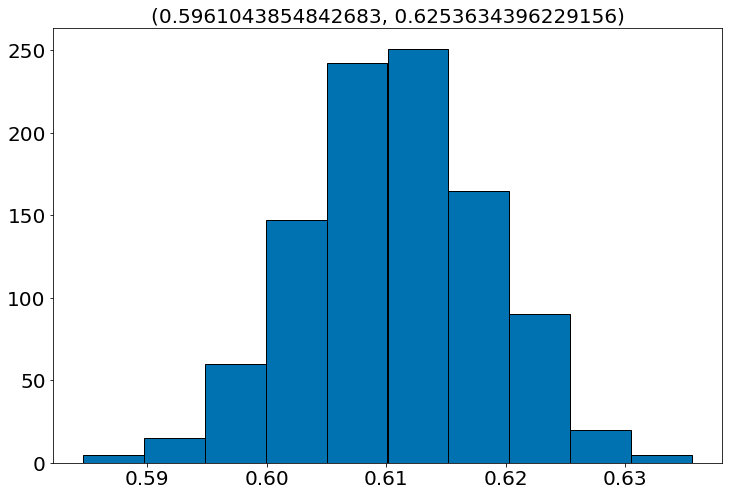

In [94]:
samples = bootstrap_score(X_train, y_train, linear)
plt.hist(samples, edgecolor='k')
plt.title('({}, {})'.format(stats.scoreatpercentile(samples, 2.5),
                            stats.scoreatpercentile(samples, 97.5)))

Text(0.5, 1.0, '(0.6019794260072318, 0.6303738557907904)')

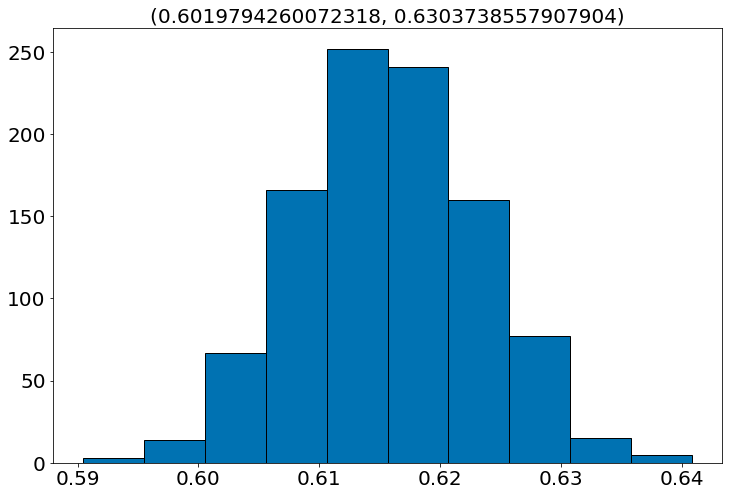

In [95]:
samples = bootstrap_score(X_train, y_train, lasso)
plt.hist(samples, edgecolor='k')
plt.title('({}, {})'.format(stats.scoreatpercentile(samples, 2.5),
                            stats.scoreatpercentile(samples, 97.5)))

Text(0.5, 1.0, '(0.6000617873359976, 0.6325599407514668)')

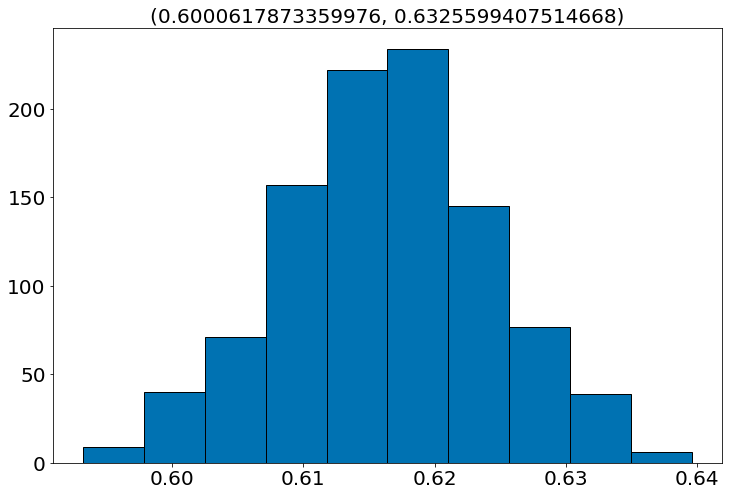

In [95]:
samples = bootstrap_score(X_train, y_train, ridge)
plt.hist(samples, edgecolor='k')
plt.title('({}, {})'.format(stats.scoreatpercentile(samples, 2.5),
                            stats.scoreatpercentile(samples, 97.5)))

Os intervalos de confiança se cruzam, portanto os modelos são estatisticamente equivalentes. Vamos escolher o ridge, simplesmente porque foi mais rápido durante os testes, e avaliar no conjunto de teste.

In [96]:
y_test = scaler_y.fit_transform(y_test.values[:, np.newaxis])
X_test = scaler_x.fit_transform(X_test.values)

Text(0.5, 1.0, '(0.6132266576624785, 0.6749720820109957)')

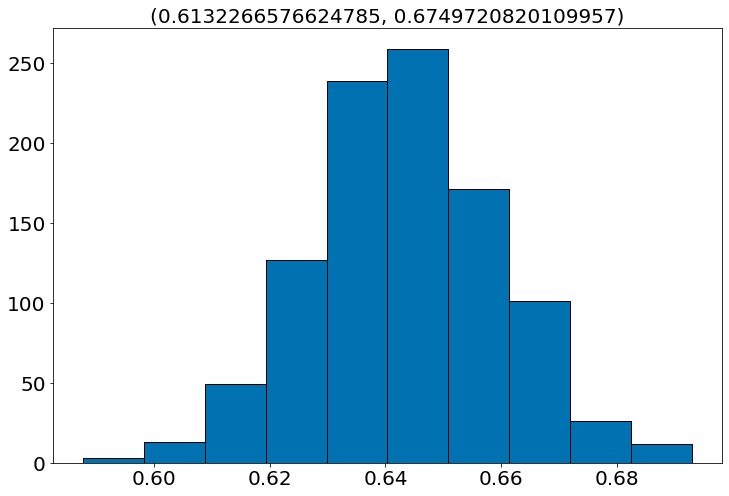

In [97]:
samples = bootstrap_score(X_test, y_test, ridge)
plt.hist(samples, edgecolor='k')
plt.title('({}, {})'.format(stats.scoreatpercentile(samples, 2.5),
                            stats.scoreatpercentile(samples, 97.5)))

Este é o intervalo do erro que esperamos para previsões em uma base real.

### Teste 2


Vamos repetir o processo, mas dessa vez queremos prever a popularidade (número de votos dos filmes). Para isso iremos adicionar a média das notas como um dos parâmetros, além disso vamos substituir o país pelo orçamento, o motivo para não utilizar ambos é que a maioria dos orçamentos registrados na base estão em dólares, ou seja, a coluna de países ficaria só com Estados Unidos.

In [98]:
print(ratings.columns)
print()
print(movies.columns)

Index(['imdb_title_id', 'weighted_average_vote', 'total_votes', 'mean_vote',
       'median_vote', 'votes_10', 'votes_9', 'votes_8', 'votes_7', 'votes_6',
       'votes_5', 'votes_4', 'votes_3', 'votes_2', 'votes_1',
       'allgenders_0age_avg_vote', 'allgenders_0age_votes',
       'allgenders_18age_avg_vote', 'allgenders_18age_votes',
       'allgenders_30age_avg_vote', 'allgenders_30age_votes',
       'allgenders_45age_avg_vote', 'allgenders_45age_votes',
       'males_allages_avg_vote', 'males_allages_votes', 'males_0age_avg_vote',
       'males_0age_votes', 'males_18age_avg_vote', 'males_18age_votes',
       'males_30age_avg_vote', 'males_30age_votes', 'males_45age_avg_vote',
       'males_45age_votes', 'females_allages_avg_vote',
       'females_allages_votes', 'females_0age_avg_vote', 'females_0age_votes',
       'females_18age_avg_vote', 'females_18age_votes',
       'females_30age_avg_vote', 'females_30age_votes',
       'females_45age_avg_vote', 'females_45age_votes',
       

In [99]:
df = pd.merge(ratings[['imdb_title_id', 'total_votes', 'mean_vote', 'allgenders_0age_avg_vote', 'allgenders_18age_avg_vote', 'allgenders_30age_avg_vote', 'allgenders_45age_avg_vote', 'males_allages_avg_vote', 'females_allages_avg_vote', ]],
              movies[['imdb_title_id', 'duration', 'budget', 'year', 'genre']], on='imdb_title_id').dropna()
df = df.drop(['imdb_title_id'], axis=1)
df.head()


,total_votes,mean_vote,allgenders_0age_avg_vote,allgenders_18age_avg_vote,allgenders_30age_avg_vote,allgenders_45age_avg_vote,males_allages_avg_vote,females_allages_avg_vote,duration,budget,year,genre
1,589,6.3,6.0,6.1,6.0,6.3,6.1,6.2,70,$ 2250,1906,"Biography, Crime, Drama"
7,273,6.2,6.0,5.9,6.2,6.3,6.2,6.3,120,ITL 45000,1913,"Drama, History"
24,3073,6.5,6.0,7.0,7.0,7.2,7.1,6.9,148,$ 210000,1914,"Adventure, Drama, History"
34,1239,7.2,6.0,6.4,6.2,5.8,6.1,6.0,61,$ 40000,1914,Drama
37,879,6.1,5.0,5.5,5.5,6.0,5.7,5.9,74,$ 20000,1914,"Action, Drama, Romance"


In [100]:
df.shape

(12840, 12)

Faremos algumas modificações para selecionar apenas os orçamentos com valor em dólares e para ajustar os valores de acordo com a inflação. Iremos utilizar um dataset extraido de https://fred.stlouisfed.org/series/CPIAUCNS.

In [101]:
# Selecionando orçamentos em dollar e convertendo para numérico
df['budget'] = df['budget'].convert_dtypes()
df = df[df['budget'].str.contains("\$")]
df['budget'] = df['budget'].str.extract('(\d+)').astype(float)

# Selecionando filmes publicados após 1913.
# 1913 é onde a base utilizada para corrigir a 
# inflação começa
df['year'] = df['year'].astype(int)
df = df[df['year'] >= 1913]
df.head()

,total_votes,mean_vote,allgenders_0age_avg_vote,allgenders_18age_avg_vote,allgenders_30age_avg_vote,allgenders_45age_avg_vote,males_allages_avg_vote,females_allages_avg_vote,duration,budget,year,genre
24,3073,6.5,6.0,7.0,7.0,7.2,7.1,6.9,148,210000.0,1914,"Adventure, Drama, History"
34,1239,7.2,6.0,6.4,6.2,5.8,6.1,6.0,61,40000.0,1914,Drama
37,879,6.1,5.0,5.5,5.5,6.0,5.7,5.9,74,20000.0,1914,"Action, Drama, Romance"
38,178,6.4,8.0,5.5,5.8,6.6,6.1,6.5,80,10000.0,1914,Drama
39,3250,7.1,5.0,6.3,6.2,6.4,6.3,6.6,82,50000.0,1914,Comedy


In [102]:
# Dataset para fazer a correção monetária pela inflação
cpi = pd.read_csv('datasets/CPIAUCNS.csv')
cpi['DATE'] =  pd.to_datetime(cpi['DATE'])
current_cpi = cpi.iloc[-1, 1]
cpi['CURRENT'] = current_cpi
cpi['CPIAUCNS'] = cpi['CURRENT'] / cpi['CPIAUCNS']
cpi

,DATE,CPIAUCNS,CURRENT
0,1913-01-01,26.692041,261.582
1,1913-02-01,26.692041,261.582
2,1913-03-01,26.692041,261.582
3,1913-04-01,26.692041,261.582
4,1913-05-01,26.967216,261.582
...,...,...,...
1292,2020-09-01,1.005002,261.582
1293,2020-10-01,1.004585,261.582
1294,2020-11-01,1.005199,261.582
1295,2020-12-01,1.004254,261.582


In [103]:
# Ajustando datas e unindo datasets
df['day'] = 1
df['month'] = 1
new_df = df[['year', 'month', 'day']]
df['DATE'] = pd.to_datetime(new_df)
df = pd.merge(df, cpi, on='DATE')

# Corrigindo a inflação
df['budget'] = df['budget'] * df['CPIAUCNS']

# Removendo colunas que não são de interesse
df = df.drop(['day', 'month', 'DATE', 'CPIAUCNS', 'CURRENT'], axis=1)

df.head()

,total_votes,mean_vote,allgenders_0age_avg_vote,allgenders_18age_avg_vote,allgenders_30age_avg_vote,allgenders_45age_avg_vote,males_allages_avg_vote,females_allages_avg_vote,duration,budget,year,genre
0,3073,6.5,6.0,7.0,7.0,7.2,7.1,6.9,148,5493222.0,1914,"Adventure, Drama, History"
1,1239,7.2,6.0,6.4,6.2,5.8,6.1,6.0,61,1046328.0,1914,Drama
2,879,6.1,5.0,5.5,5.5,6.0,5.7,5.9,74,523164.0,1914,"Action, Drama, Romance"
3,178,6.4,8.0,5.5,5.8,6.6,6.1,6.5,80,261582.0,1914,Drama
4,3250,7.1,5.0,6.3,6.2,6.4,6.3,6.6,82,1307910.0,1914,Comedy


Agora faremos one-hot encoding nas colunas com dados categóricos

In [104]:
mlb = MultiLabelBinarizer(sparse_output=True)

# One-hot encoding do treino
df['year'] = df['year'].astype(str)
df['year'] = df['year'].str.split(',')
df['genre'] = df['genre'].str.split(',')
df = df.join(pd.DataFrame.sparse.from_spmatrix(mlb.fit_transform(df.pop('year')), index=df.index, columns=mlb.classes_), how = 'left', lsuffix = '_left', rsuffix = '_right')
df = df.join(pd.DataFrame.sparse.from_spmatrix(mlb.fit_transform(df.pop('genre')), index=df.index, columns=mlb.classes_), how = 'left', lsuffix = '_left', rsuffix = '_right')
df

,total_votes,mean_vote,allgenders_0age_avg_vote,allgenders_18age_avg_vote,allgenders_30age_avg_vote,allgenders_45age_avg_vote,males_allages_avg_vote,females_allages_avg_vote,duration,budget,...,History,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,3073,6.5,6.0,7.0,7.0,7.2,7.1,6.9,148,5.493222e+06,...,0,0,0,0,0,0,0,0,0,0
1,1239,7.2,6.0,6.4,6.2,5.8,6.1,6.0,61,1.046328e+06,...,0,0,0,0,0,0,0,0,0,0
2,879,6.1,5.0,5.5,5.5,6.0,5.7,5.9,74,5.231640e+05,...,0,0,0,0,0,0,0,0,0,0
3,178,6.4,8.0,5.5,5.8,6.6,6.1,6.5,80,2.615820e+05,...,0,0,0,0,0,0,0,0,0,0
4,3250,7.1,5.0,6.3,6.2,6.4,6.3,6.6,82,1.307910e+06,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982,18390,5.3,5.4,5.4,5.4,5.2,5.4,5.3,87,5.069988e+06,...,0,0,0,0,0,0,0,0,0,0
9983,8755,4.7,3.7,4.4,4.6,4.9,4.6,4.7,86,1.013998e+07,...,0,0,0,0,0,0,0,0,0,0
9984,4105,6.2,7.3,6.1,5.8,5.1,5.8,6.4,92,3.041993e+06,...,0,0,0,0,0,0,0,0,0,0
9985,19858,6.8,5.7,7.0,6.6,6.6,6.5,7.0,124,1.013998e+07,...,0,0,0,0,0,0,0,0,0,0


Dividimos o dataframe em um conjunto para treino e outro para testes

In [105]:
train_df, test_df = train_test_split(df, test_size=0.2)
print(train_df.shape)
print(test_df.shape)

(7989, 157)
(1998, 157)


In [106]:
# Treino
y_train_df = train_df['total_votes']
X_train_df = train_df.drop('total_votes', axis='columns')

#Teste
y_test = test_df['total_votes']
X_test = test_df.drop('total_votes', axis='columns')


As colunas possuem escalas diferentes, portanto é necessário z-normalizar os atributos numéricos

In [107]:
scaler_x = StandardScaler()
scaler_y = StandardScaler()

y_train = scaler_y.fit_transform(y_train_df.values[:, np.newaxis])
X_train = scaler_x.fit_transform(X_train_df.values)

Iniciaremos o aprendizado de máquina, a partir daqui o conjunto de testes não será utilizado. Testaremos modelos de regressão linear e vizinho mais próximo. Faremos validação-cruzada para minimizar o erro dos parâmetros de regularização.

In [108]:
linear = linear.fit(X_train, y_train)
linear.score(X_train, y_train)

0.40628355364279434

In [109]:
lasso = lasso.fit(X_train, y_train)
lasso.score(X_train, y_train)

0.40595806482524666

In [110]:
ridge = ridge.fit(X_train, y_train)
ridge.score(X_train, y_train)

0.405885236791493

Verificamos o erro quadrado médio na previsão dos modelos

In [111]:
mean_squared_error(y_train, linear.predict(X_train))

0.5937164463572057

In [112]:
mean_squared_error(y_train, lasso.predict(X_train))

0.5940419351747533

In [113]:
mean_squared_error(y_train, ridge.predict(X_train))

0.594114763208507

Podemos também comparar algumas previsões de cada modelo.

In [114]:
pred = pd.Series(y_train.flatten())
pred = pred.to_frame(name='total_votes')
pred.assign(
    linear = linear.predict(X_train),
    lasso = lasso.predict(X_train),
    ridge = ridge.predict(X_train))

,total_votes,linear,lasso,ridge
0,0.031333,0.348917,0.344660,0.345401
1,0.052689,0.285654,0.281482,0.277406
2,-0.457542,-0.717055,-0.685866,-0.711370
3,-0.355893,0.156030,0.157260,0.167508
4,-0.453475,-0.023039,-0.054408,-0.053002
...,...,...,...,...
7984,-0.345362,0.268495,0.272084,0.259943
7985,-0.398620,0.234910,0.226582,0.239392
7986,-0.335631,0.499750,0.483911,0.487386
7987,-0.459982,-0.362189,-0.382419,-0.381808


Utilizaremos bootstrap para comparar o intervalo dos erros quadrados de cada modelo

Text(0.5, 1.0, '(0.5004227188515689, 0.6920301219796698)')

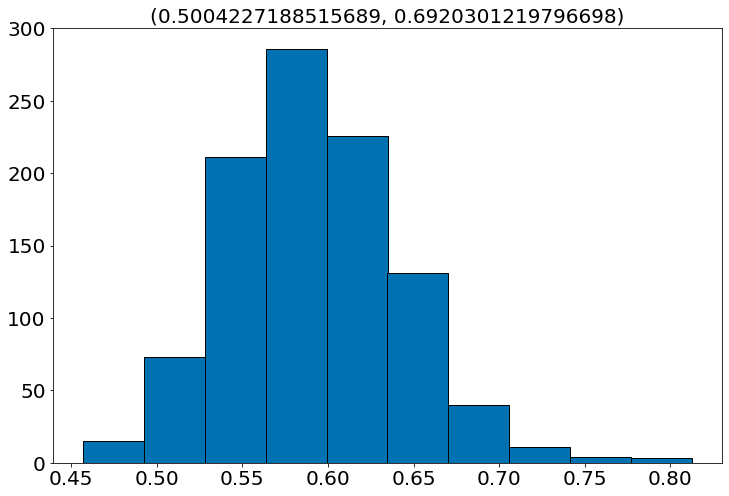

In [115]:
samples = bootstrap_score(X_train, y_train, linear)
plt.hist(samples, edgecolor='k')
plt.title('({}, {})'.format(stats.scoreatpercentile(samples, 2.5),
                            stats.scoreatpercentile(samples, 97.5)))

Text(0.5, 1.0, '(0.5030693167258359, 0.7016936191902647)')

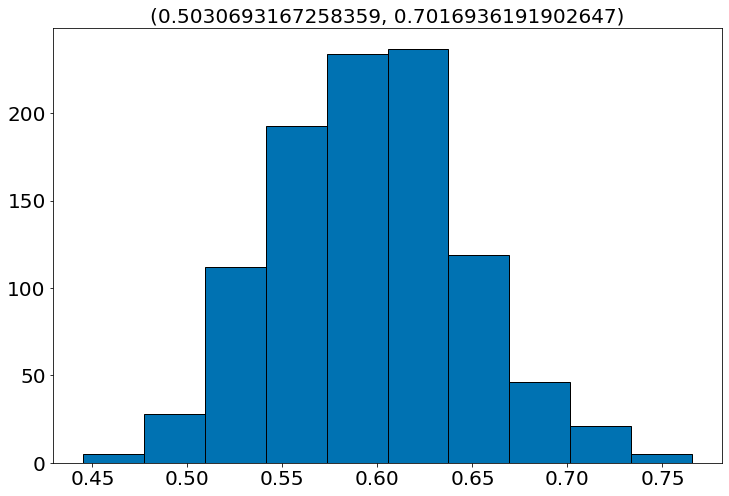

In [116]:
samples = bootstrap_score(X_train, y_train, lasso)
plt.hist(samples, edgecolor='k')
plt.title('({}, {})'.format(stats.scoreatpercentile(samples, 2.5),
                            stats.scoreatpercentile(samples, 97.5)))

Text(0.5, 1.0, '(0.5025401892077692, 0.6941841799262968)')

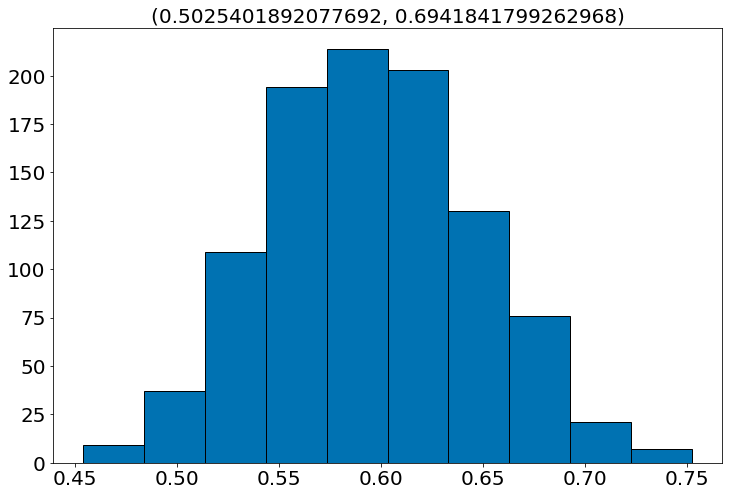

In [117]:
samples = bootstrap_score(X_train, y_train, ridge)
plt.hist(samples, edgecolor='k')
plt.title('({}, {})'.format(stats.scoreatpercentile(samples, 2.5),
                            stats.scoreatpercentile(samples, 97.5)))

Os intervalos de confiança se cruzam, portanto os modelos são estatisticamente equivalentes. Vamos escolher o ridge, simplesmente porque foi mais rápido durante os testes, e avaliar no conjunto de teste.

In [118]:
y_test = scaler_y.fit_transform(y_test.values[:, np.newaxis])
X_test = scaler_x.fit_transform(X_test.values)

Text(0.5, 1.0, '(0.41030991692410057, 0.8494086574225365)')

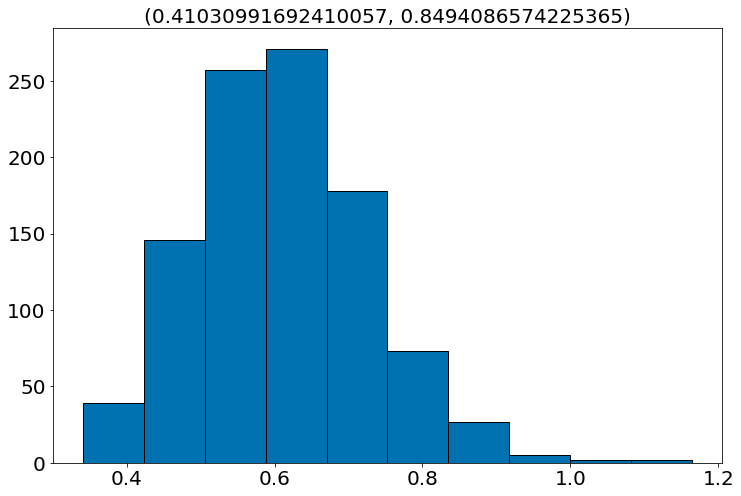

In [119]:
samples = bootstrap_score(X_test, y_test, ridge)
plt.hist(samples, edgecolor='k')
plt.title('({}, {})'.format(stats.scoreatpercentile(samples, 2.5),
                            stats.scoreatpercentile(samples, 97.5)))

Este é o intervalo do erro que esperamos para previsões em uma base real.